# Import

In [1]:
%pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt

# Code

In [5]:
img=cv2.imread(r'C:\Users\linge\Desktop\python 100 days\Machine Learning\image_classification\images_dataset\maria_sharapova\sharapova-hits-the-practice-courts-and-met-ball-kids.jpg')

In [6]:
img.shape

(555, 700, 3)

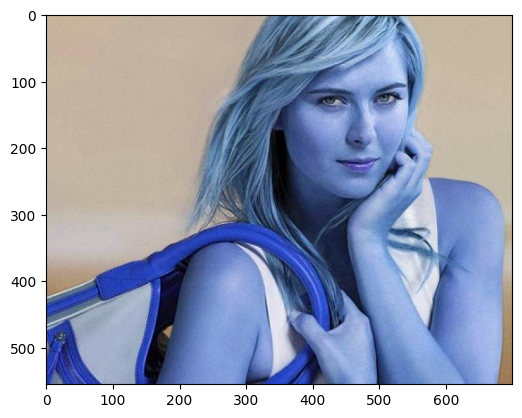

In [5]:
plt.imshow(img)

# Face and Eye Detection

In [3]:
face_cascade= cv2.CascadeClassifier(r'C:\Users\linge\Desktop\python 100 days\Machine Learning\image_classification\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier(r'C:\Users\linge\Desktop\python 100 days\Machine Learning\image_classification\haarcascades\haarcascade_eye.xml')

In [7]:
face=face_cascade.detectMultiScale(img,1.3,5)
face

array([[352,  38, 233, 233]])

In [8]:
(x,y,w,h)=face[0]
x,y,w,h

(352, 38, 233, 233)

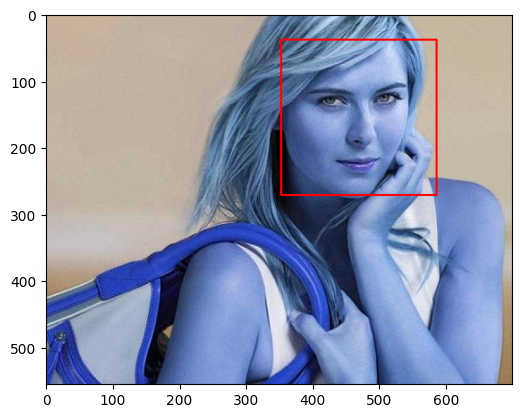

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

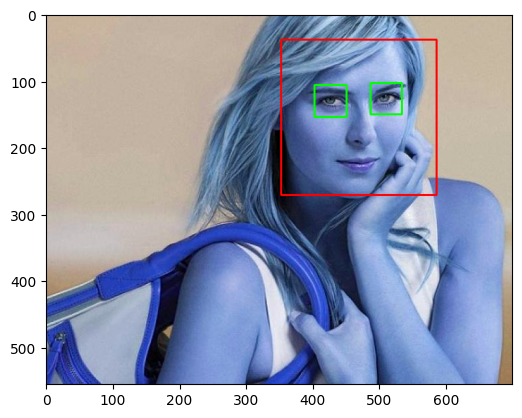

In [10]:
cv2.destroyAllWindows()
for(x,y,w,h) in face:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=img[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

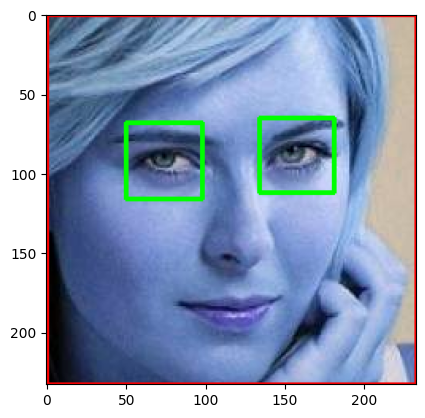

In [11]:
plt.imshow(roi_color,cmap='gray')

In [8]:
def get_cropped_image(img_path):
    try:
        img=cv2.imread(img_path)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:
            roi_gray=gray[y:y+h,x:x+w]
            roi_color= img[y:y+h,x:x+w]
            eyes=eye_cascade.detectMultiScale(roi_gray)
            if len(eyes)>=2:
                return roi_color
            return None
    except:
        pass
    # print(img)
    
    

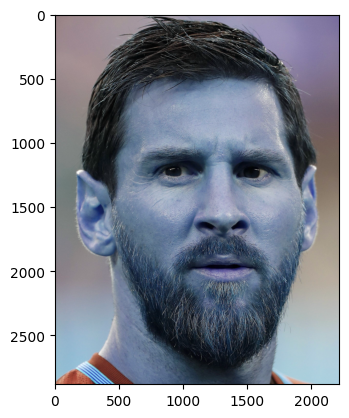

In [13]:
original=cv2.imread(r'C:\Users\linge\Desktop\python 100 days\Machine Learning\image_classification\images_dataset\lionel_messi\28003-1510231943.jpg')
plt.imshow(original)

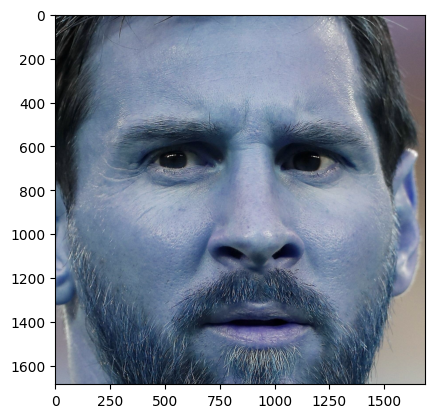

In [14]:
cropped_img= get_cropped_image(r'C:\Users\linge\Desktop\python 100 days\Machine Learning\image_classification\images_dataset\lionel_messi\28003-1510231943.jpg')
plt.imshow(cropped_img)

In [72]:
path_to_data='./images_dataset/'
path_to_cr_data='./images_dataset/cropped_images/'

In [73]:
import os 
img_dirs=[]
for entry in os.scandir(path_to_data):#scandir goes to all directories
    if entry.is_dir():
        img_dirs.append(entry.path)

In [74]:
img_dirs

['./images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

# Creating Cropped Images Folder

In [75]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [76]:
cropped_image_dir=[]
celebirity_file_name_dict={}

for img_dir in img_dirs:
    count=1
    celebrities_name= img_dir.split('/')[-1]
    celebirity_file_name_dict[celebrities_name]=[]
    print(celebrities_name)
    
    for entry in os.scandir(img_dir):
        roi_color= get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder= path_to_cr_data + celebrities_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dir.append(cropped_folder)


            cropped_file_name= celebrities_name + str(count) + '.png'
            cropped_file_path=cropped_folder + '/' + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebirity_file_name_dict[celebrities_name].append(cropped_file_path)
            count+=1


lionel_messi
maria_sharapova
roger_federer
serena_williams
virat_kohli


In [77]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dir:
    celebirty_name= img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
        celebrity_file_names_dict[celebirty_name]=file_list
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped_images/lionel_messi\\lionel_messi1.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi10.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi11.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi12.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi13.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi14.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi15.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi16.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi17.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi18.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi19.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi2.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi20.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi21.png',
  './i

# Wavelet Transform

In [16]:
%pip install PyWavelets

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [78]:
import numpy as np
import pywt
import cv2

In [79]:
def w2d(img,mode='haar',level=1):
    imArray=img
    #DataType Converstion
    # convert to gyroscope
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to floa
    imArray=np.float32(imArray)
    imArray /= 255

    #compute coefficent
    coeff=pywt.wavedec2(imArray, mode, level=level)

    #Process Coffecient
    coeffs_M=list(coeff)
    coeffs_M[0] *= 0
    

    imArray_H=pywt.waverec2(coeffs_M, mode)
    imArray_H  *=255
    imArray_H= np.uint8(imArray_H)

    return imArray_H


In [17]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

NameError: name 'cropped_img' is not defined

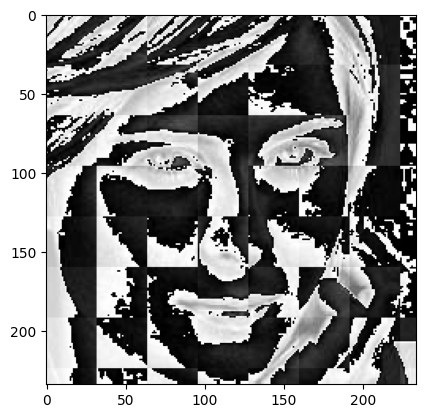

In [34]:
im_har=w2d(get_cropped_image(r'C:\Users\linge\Desktop\python 100 days\Machine Learning\image_classification\images_dataset\maria_sharapova\sharapova-hits-the-practice-courts-and-met-ball-kids.jpg'),'db1',5)
plt.imshow(im_har,cmap='gray')

# X and Y

In [80]:
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped_images/lionel_messi\\lionel_messi1.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi10.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi11.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi12.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi13.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi14.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi15.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi16.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi17.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi18.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi19.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi2.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi20.png',
  './images_dataset/cropped_images/lionel_messi\\lionel_messi21.png',
  './i

In [81]:
classification_dict={'lionel_messi':0,
'maria_sharapova':1,
"roger_federer":2,
'serena_williams':3,
'virat_kohli':4}

In [82]:
X=[]
y=[]
for celebitirty_name, train_file in celebrity_file_names_dict.items():
    for train_img in train_file:
        img= cv2.imread(train_img)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        coimbined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(coimbined_img)
        y.append(classification_dict[celebitirty_name])

In [83]:
len(X)# 170 Images

171

In [84]:
32*32*3 + 32*32

4096

In [85]:
X=np.array(X).reshape(len(X),4096).astype(float)


In [86]:
X.shape

(171, 4096)

In [87]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [88]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

# Model Training

In [89]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [91]:
len(X_train)

128

In [92]:
len(X_test)

43

In [93]:
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [94]:
pipe.score(X_test,y_test)

0.8372093023255814

In [95]:
y_predicted=pipe.predict(X_test)

In [96]:
classification_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [97]:
y_predicted
cc={value:key for key,value in classification_dict.items()}
for i in y_predicted:
    print(cc[i])

maria_sharapova
lionel_messi
maria_sharapova
maria_sharapova
virat_kohli
serena_williams
lionel_messi
virat_kohli
serena_williams
roger_federer
virat_kohli
virat_kohli
lionel_messi
roger_federer
virat_kohli
roger_federer
lionel_messi
lionel_messi
maria_sharapova
maria_sharapova
maria_sharapova
serena_williams
lionel_messi
serena_williams
virat_kohli
serena_williams
roger_federer
virat_kohli
virat_kohli
virat_kohli
lionel_messi
maria_sharapova
virat_kohli
maria_sharapova
lionel_messi
virat_kohli
virat_kohli
serena_williams
serena_williams
virat_kohli
lionel_messi
lionel_messi
roger_federer


In [98]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       1.00      0.80      0.89        10
           2       0.80      0.80      0.80         5
           3       0.86      0.75      0.80         8
           4       0.69      0.90      0.78        10

    accuracy                           0.84        43
   macro avg       0.85      0.83      0.83        43
weighted avg       0.86      0.84      0.84        43



In [99]:
model_params={
    'svm':{
        'model':SVC(gamma='auto',probability=True),
        'params':{
            'C':[1,10,100,1000],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },

}

In [102]:
scores=[]
best_estimators={}
for model_name, mp in model_params.items():
    
    classifier=GridSearchCV(
        mp['model'],
        mp['params'],
        cv=5,
        return_train_score=False
    )
    classifier.fit(X_train,y_train)
    scores.append(
        {'model':model_name,
        'best_score':classifier.best_score_,
        'best_params':classifier.best_params_}
    )
    best_estimators[model_name]=classifier.best_estimator_

C:\Users\linge\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\linge\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\linge\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\linge\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_mo

In [104]:
best_estimators

{'svm': SVC(C=1, gamma='auto', kernel='linear', probability=True),
 'random_forest': RandomForestClassifier(n_estimators=5),
 'logistic_regression': LogisticRegression(C=1, multi_class='auto', solver='liblinear')}

In [103]:
import pandas as pd 
df=pd.DataFrame(scores)
df

,model,best_score,best_params
0,svm,0.725846,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.562769,{'n_estimators': 5}
2,logistic_regression,0.717538,{'C': 1}


# Best Classifier

In [107]:
best_estimators['svm'].score(X_test,y_test)

0.7674418604651163

In [108]:
best_estimators['random_forest'].score(X_test,y_test)

0.6046511627906976

In [110]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7441860465116279

In [114]:
best_classifier=best_estimators['svm']

In [112]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,best_classifier.predict(X_test))
cm

array([[7, 0, 0, 2, 1],
       [0, 6, 1, 0, 3],
       [0, 0, 5, 0, 0],
       [0, 0, 1, 6, 1],
       [1, 0, 0, 0, 9]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

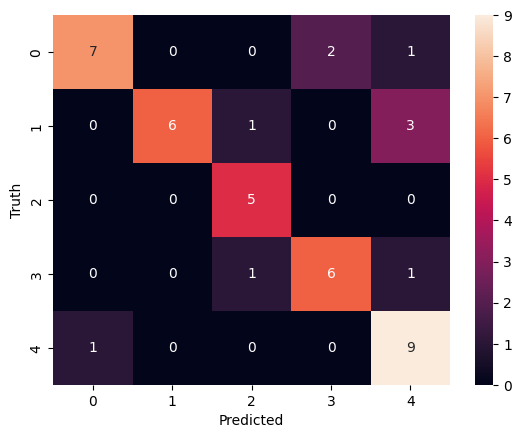

In [118]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Model Saving

In [119]:
%pip install joblib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [120]:
import joblib
joblib.dump(best_classifier,'saved_model.pkl')

['saved_model.pkl']

In [123]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(classification_dict))